# Here, we explore results and explain some methods regarding:

- Similarity matrices for the set of chemical elements, yearly.
- Optimization with genetic algorithms.

## This involves:

- Visualization of similarity matrices.
- Computation of baselines for optimization of permutations of list of elements.
- Visualization of reshuffled matrices.
- Formulation/explanation of a method for comparison of permutations.
- Testing such a method
- Historical analysis: Comparison of permutations (PSs) between all pairs of years.

In [2]:
import sys
sys.path.append('../similarity')
sys.path.append('../Genetic1D')

from simMat import *
from genetic1D import *

import matplotlib.colors as colors
from matplotlib.ticker import (MultipleLocator, FixedLocator)

rootPath = '../'

# Load similarity matrices
simMat_yr = np.load(rootPath + 'Data/simMat.npy',allow_pickle=True)
min_yr = 1800

cmap=cm.get_cmap("jet")

# Load element list
elemList = getElemList(rootPath + 'Data/')

## Visualization of the obtained similarity matrices

- Modify `year` to see evolution of similarities

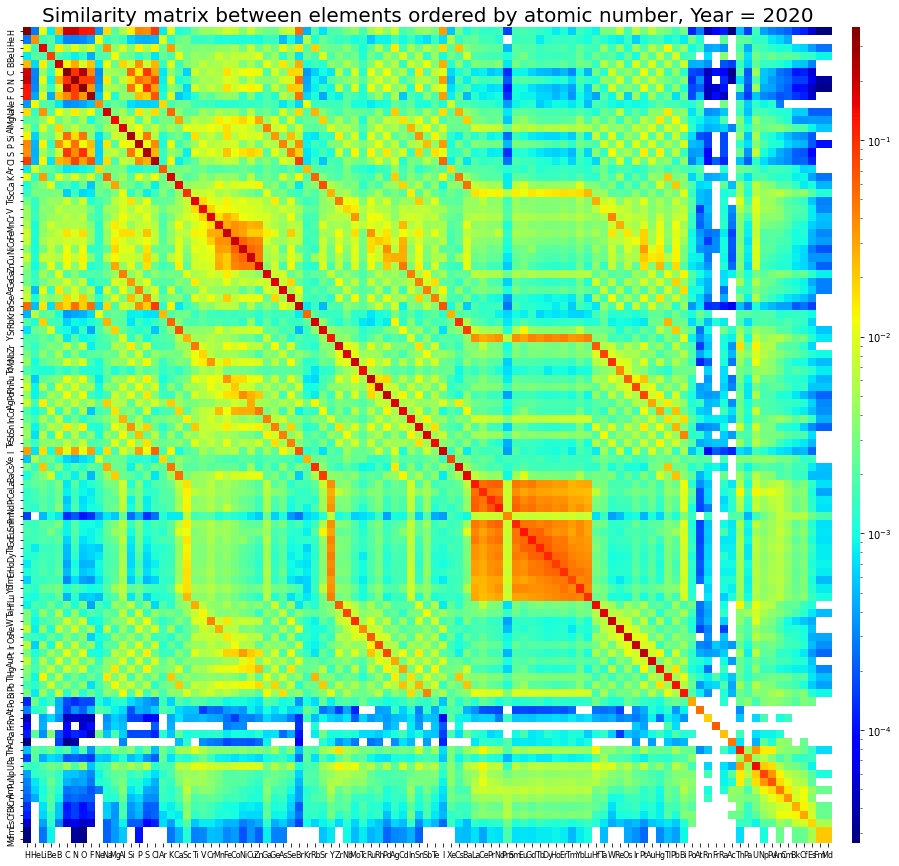

In [3]:
year = 2020

plot_simMat_yr(simMat_yr,year,min_yr=min_yr,raw=0,scale=15,
               cmap=cmap,EL=elemList);#,save='sim{}.png'.format(year));

In [4]:
def symmetrize(S,zero_diag=False):
    """Get symmetrized version (P) of matrix S"""
    # Set all nans to 0
    S = np.nan_to_num(S,0)    

    diag = np.diag(S)
    n = S.shape[0]
    Sum0 = S.sum(axis=0).reshape(-1,1).repeat(n,axis=1)#-np.diag(diag)
    Sum1 = S.sum(axis=1).reshape(1,-1).repeat(n,axis=0)#-np.diag(diag)

    P = np.sqrt(S**2/(Sum0*Sum1+1e-5))

    P = np.nan_to_num(P,0)  # If entry is nan, then element doesn't exist. Make weight == 0.

    # Set diagonal elements to 0
    inds = np.arange(0,n)
    if zero_diag:
        P[inds,inds] = 0
    return P

year=2021
S = simMat_yr[year - min_yr].copy()
P = symmetrize(S)

## Optimal Permutations: 1D-Periodic Systems.

- Calculate errors of previously computed permutations (i.e. Atomic Number ordering, and others from refs. [Pettifor](https://www.sciencedirect.com/science/article/pii/0038109884907658) and [Glawe et.al.](https://iopscience.iop.org/article/10.1088/1367-2630/18/9/093011))

In [5]:
fh = open('../Results/optim_permut_yearly.gen', 'rb') 
Indivs_yr = pickle.load(fh)

# Each year, sort optimized permutations by cost
Indivs_yr_sort = {}
for yr in Indivs_yr.keys():
    Indivs_yr_sort[yr] = []
    
    S = simMat_yr[yr - min_yr].copy()
    P = symmetrize(S,zero_diag=True)

    a = np.array([cost(P,ind) for ind in Indivs_yr[yr]])

    # Sort the list of Individuals for each year, based on cost
    order = np.argsort(a)
    Indivs_yr_sort[yr] = np.array(Indivs_yr[yr])[order]

In [6]:
# Calculate P for calculating cost function
year=2021
S = simMat_yr[year - min_yr].copy()
P = symmetrize(S,zero_diag=True)

print("Relative to similarity matrices of {}, different orderings perform as follows:\n".format(year))

# Set a reference ordering: atomic number
orderAO = np.arange(P.shape[0])

print(f"Cost using AN order = {cost(P, orderAO):.5f}")

# 2. Check how Pettifor's scale does on these data.
pettif = ['He','Ne','Ar','Kr','Xe','Rn','Fr','Cs','Rb','K','Na','Li','Ra','Ba','Sr','Ca','Yb','Eu','Y',
          'Sc','Lu','Tm','Er','Ho','Dy','Tb','Gd','Sm','Pm','Nd','Pr','Ce','La','Lr','No','Md','Fm','Es',
          'Cf','Bk','Cm','Am','Pu','Np','U','Pa','Th','Ac','Zr','Hf','Ti','Nb','Ta','V','Mo','W','Cr',
          'Tc','Re','Mn','Fe','Os','Ru','Co','Ir','Rh','Ni','Pt','Pd','Au','Ag','Cu','Mg','Hg','Cd','Zn',
          'Be','Tl','In','Al','Ga','Pb','Sn','Ge','Si','B','Bi','Sb','As','P','Po','Te','Se','S','C','At',
          'I','Br','Cl','N','O','F','H']

# List the position of each element in Pettifor scale
order_pett = np.array([pettif.index(e) for e in elemList])
# e.g. H: 102, He: 0, Li: 11, etc
print(f"Cost Pettifor = {cost(P, order_pett):.5f}")

# See how their GA solution works

GA_ref = ['He','Ne','Ar','At','Rn','Fr','Es','Fm','Md','No','Lr','Kr','Xe','Pm','Cs','Rb','K','Na',
          'Li','Ra','Ba','Sr','Ca','Eu','Yb','Lu','Tm','Y','Er','Ho','Dy','Tb','Gd','Sm','Nd','Pr',
          'Ce','La','Ac','Am','Cm','Bk','Cf','Pu','Np','U','Th','Pa','Sc','Zr','Hf','Ti','Nb','Ta',
          'V','Cr','Mo','W','Re','Tc','Os','Ru','Ir','Rh','Pt','Pd','Au','Ag','Cu','Ni','Co','Fe',
          'Mn','Mg','Zn','Cd','Hg','Be','Al','Ga','In','Tl','Pb','Sn','Ge','Si','B','C','N','P','As',
          'Sb','Bi','Po','Te','Se','S','O','I','Br','Cl','F','H']

Prop_modif = ['He','Ne','Ar','Kr','Xe','Rn','Fr','Cs','Rb','K','Na','Li','Ra','Ba','Sr','Ca','Eu','Yb',
          'Lu','Tm','Y','Er','Ho','Dy','Tb','Gd','Sm','Pm','Nd','Pr','Ce','La','Ac','Th','Pa','U',
          'Np','Pu','Am','Cm','Bk','Cf','Es','Fm','Md','No','Lr','Sc','Zr','Hf','Ti','Ta','Nb','V','Cr','Mo','W',
          'Re','Tc','Os','Ru','Ir','Rh','Pt','Pd','Au','Ag','Cu','Ni','Co','Fe','Mn','Mg','Zn','Cd',
          'Hg','Be','Al','Ga','In','Tl','Pb','Sn','Ge','Si','B','C','N','P','As','Sb','Bi','Po','Te',
          'Se','S','O','At','I','Br','Cl','F','H']



# List the position of each element in GA scale
order_GA = np.array([GA_ref.index(e) for e in elemList])
# e.g. H: 102, He: 0, Li: 11, etc
print(f"Cost GA Glawe = {cost(P, order_GA):.5f}")


# List the position of each element in Pettif modif. scale by Glawe
order_Pmod = np.array([Prop_modif.index(e) for e in elemList])
# e.g. H: 102, He: 0, Li: 11, etc
print(f"Cost Pm Glawe = {cost(P, order_Pmod):.5f}")



# Finally test Oganov's MN

oganov = ['Fr','Cs','Rb','K','Ra','Ba','Sr','Ac','Ca','Na','Rn','Yb','La','Pm','Tb','Sm','Gd',
          'Eu','Y','Dy','Th','Ho','Er','Tm','Lu','Li','Ce','Mg','Pr','Hf','Xe','Zr','Nd','Sc',
          'Tl','Pa','Pu','U','Cm','Am','Np','Cd','Pb','Ta','In','Po','At','Nb','Ti','Al','Bi',
          'Sn','Zn','Hg','Te','Sb','Ga','V','Mn','Ag','Cr','Be','Kr','Ge','Re','Si','Tc','Cu',
          'I','Fe','As','Ni','Co','Mo','Ar','Pd','Ir','Os','Pt','Ru','P','Rh','W','Se','Au',
          'B','S','Br','Cl','H','Ne','He','C','N','O','F']


# List the position of each element in Oganov's scale
order_ogan = np.array([oganov.index(e) for e in elemList if e in oganov])

# Create a copy of P, with only entries for elements considered in Oganovs ordering
in_ogan = np.array([i for i,e in enumerate(elemList) if e in oganov])
P_og = P[in_ogan][:,in_ogan]


print(f"Cost USE Oganov = {cost(P_og, order_ogan):.5f}\n")


# Performance of random configurations
print("Cost achieved by random permutations:\n")
rand_ord_cost = [cost(P, np.random.permutation(orderAO)) for i in range(5000)]
print(pd.Series(rand_ord_cost).describe())


print()
print("This work's best 15 for this year:")
print(year)
for i, ind in enumerate(Indivs_yr_sort[year]):
    if i==15:
        break
    print(f"\t{cost(P,ind)}")

Relative to similarity matrices of 2021, different orderings perform as follows:

Cost using AN order = -8.63007
Cost Pettifor = -12.68225
Cost GA Glawe = -12.78067
Cost Pm Glawe = -12.61547
Cost USE Oganov = -8.97588

Cost achieved by random permutations:

count    5000.000000
mean       -4.310013
std         0.234305
min        -5.340681
25%        -4.455500
50%        -4.284920
75%        -4.142566
max        -3.728923
dtype: float64

This work's best 15 for this year:
2021
	-14.243839268752142
	-14.099928083649113
	-14.05882962367627
	-13.988856068234933
	-13.884353692672569
	-13.874662638024036
	-13.860486784284388
	-13.847019508107511
	-13.817721898329712
	-13.747817358091659
	-13.737591860811994
	-13.726021632747091
	-13.722826172940305
	-13.716307208880128
	-13.710432087839823


Best cost obtained for year 2016 is -14.123


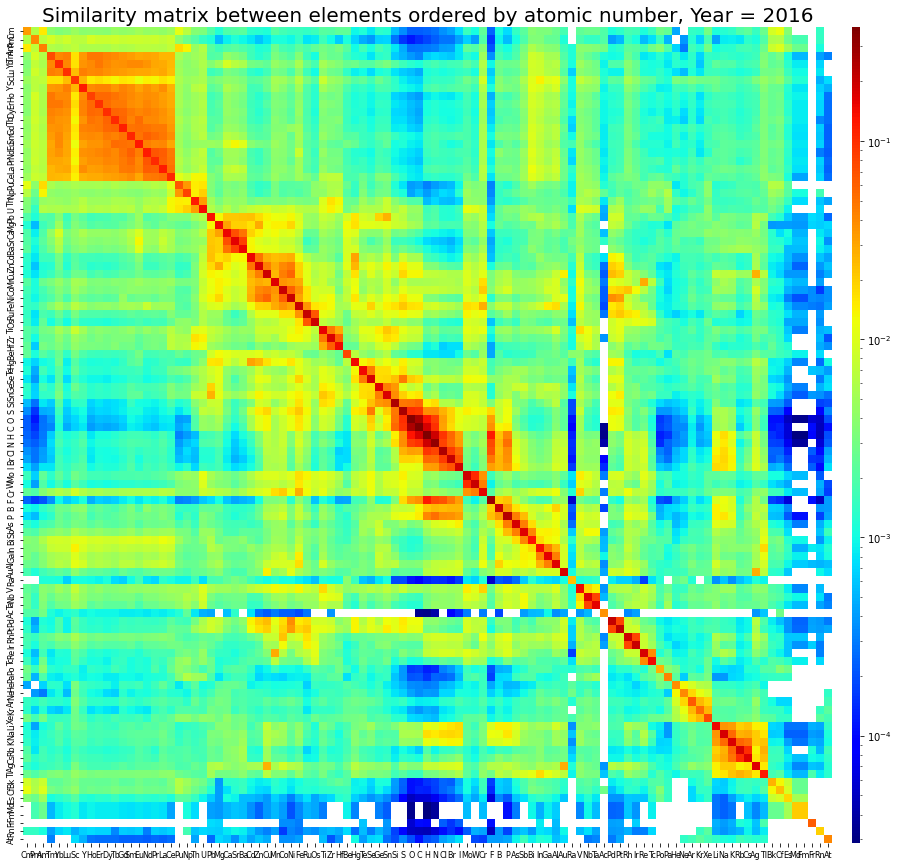

In [7]:
def bestInd(year):
    S = simMat_yr[year - min_yr].copy()
    P = symmetrize(S,zero_diag=True)

    best_in, best_cost = None, 0
    for i in Indivs_yr[year]:
        c = cost(P, i)
        if c<best_cost:
            best_cost=c
            best_in=i
    return best_in, best_cost


year=2016
best_in, best_cost = bestInd(year)

plot_simMat_yr(simMat_yr,year,min_yr=min_yr,raw=False,scale=15,
               ordering=best_in,cmap=cmap,EL=elemList)#,save="simmatopt{}.png".format(year))

print("Best cost obtained for year {} is {:.3f}".format(year,best_cost))

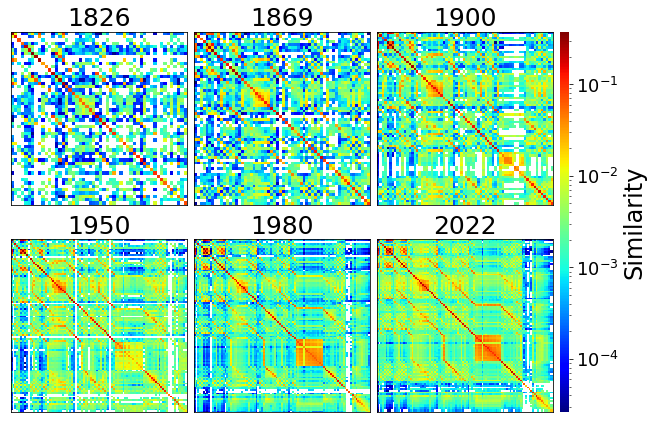

In [8]:
def plot_SM_years(simMat_yr,years,min_yr,save=False,cmap=False,show=True,EL=False,):

    Ps = {}
    
    for year in years:
        S = simMat_yr[year - min_yr].copy()
        P = symmetrize(S)
        
        # Remove empty cols
        e = np.nansum(P,axis=0)>0
        
        Ps[year]=P[e][:,e]


    if show: 
        n=len(years)//2
        wr = [100 for i in range(n)] + [5]
        fig,ax = plt.subplots(2,n+1,figsize=(10,7),
                             gridspec_kw={"wspace":0.05,"hspace":0.2,"width_ratios":wr})
        

        gs = ax[0, n-1].get_gridspec()
        # remove the underlying axes
        for axi in ax[:, -1]:
            axi.remove()
        cbar = fig.add_subplot(gs[:, -1])
        
        
        ax = ax[:,:-1].ravel()
        ax[0].set_title("Similarity matrix between elements ordered by atomic number, Year = {}".format(year),    
                fontsize=20)
        
        
        #fig.suptitle(f"Similarity Matrix ordered by Z, for years:", fontsize=20)
        
        for i,y in enumerate(years):
            p = sns.heatmap(Ps[y],norm=LogNorm(),ax=ax[i],#cbar=None,
                        cbar_ax=cbar,
                            cmap=cmap)
            
            
            ax[i].set_title(f"{y}", fontsize=25)
            ax[i].set_xticks([])
            ax[i].set_yticks([])
            
        
            for sp in ax[i].spines.items():
                sp[1].set_visible(True)
        #fig.subplots_adjust(top=0.8)
        
        cbar.yaxis.set_label_position("right")
        cbar.set_ylabel("Similarity", fontsize=24)

        if save: plt.savefig(save,dpi=400,bbox_inches='tight')

plt.rcParams["font.size"] = 18
years = [1826, 1869, 1900, 1950, 1980, 2022]
plot_SM_years(simMat_yr,years,min_yr,show=True,EL=elemList,cmap=cmap,
                     save=f"SMs_Z.png",);

Random orderings have F values typically between $-4$ and $-5$, while using AN ordering improves this value down to $-8.66$. Pettifor does much better, and the GA solution does perform better than the original Pettifor scale, although is not as dramatic a result as reported in ref.

--- 

## Genetic algorithms for optimization of permutations of elements, analog to Pettifor scale).

Ultimately, what we need to do is find an optimal permutation of the numbers in the range from 0 to $N$ ($N=103$ in 2015). 

The algorithm (as implemented in `genetic1D.py`) works as follows:

- An `Individual` class is created. And instance of this is a particular ordering with derived properties such as cost, and functions useful for optimization, such as crossover and mutate.

- A `Population` class is created. This generates a collection of `Individual` instances, and allows to optimize from this gene pool.

### Code for an optimization looks as follows:
<br>

```python
T , popSize, NGens, mutRate = 0.4,1000, 500, 0.2
breed = Population(popSize, 103, P=P).evolve(NGens,T=T,mutRate=mutRate)
```

Parameters T, popSize, NGens, mutRate must be tuned.

- T is a temperature parameter of a Boltzmann's distribution. It controls how much highlighted are best-performing individuals each generation.

---

## Let's see some results of our optimizations

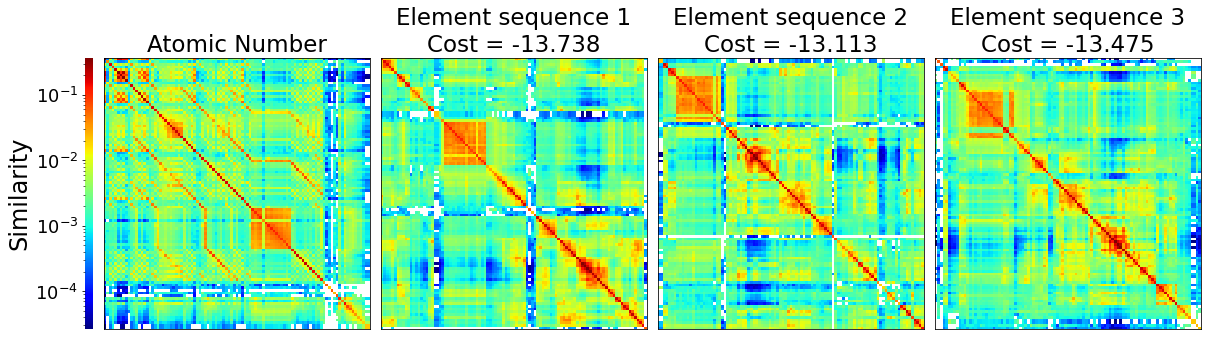

In [9]:
def plot_SM_reshuff(simMat_yr,year,min_yr,save=False,cmap=False,show=True,EL=False,N=3):
    """Plot similarity matrix for a given year
    year: which year to plot
    raw:  plot the raw normalized matrix (non-symmetric)
        if raw=False: plot symmetrized version
    ordering: lists position of elements ordered by atomic number. 
        e.g. [40,21,10] means H is in position 40, He in 21 and Li is 10th.
    """
    S = simMat_yr[year - min_yr].copy()

        
    Ps = {}
    costs={}
    
    # Choose perms
    permuts = np.random.choice(len(Indivs_yr[year]), N)
    
    
    for j in range(N+1):
        if j>0:
            # Use perms to reorder matrix
            indices = ['_' for i in range(103)]
            labels = indices.copy()
            for i,idx in enumerate(Indivs_yr[year][permuts[j-1]]):

                indices[idx] = i
                labels[idx] = EL[i]
            P = S[indices][:,indices].copy()
        else: P=S
 
        # Remove non-existent elements (diag==0)
        diag = np.diag(P)
        isn = diag!=0
        P = P[isn][:,isn]
        n = isn.sum()
        diag = diag[isn]

        Sum0 = P.sum(axis=0).reshape(-1,1).repeat(n,axis=1)
        Sum1 = P.sum(axis=1).reshape(1,-1).repeat(n,axis=0)
        P = np.sqrt(P**2/(Sum0*Sum1))  
               
        Ps[j] = P
        
    Pcost = symmetrize(S, zero_diag=True) 
    costs = [cost(Pcost, np.arange(Pcost.shape[0]))] + [cost(Pcost,Indivs_yr[year][p]) for p in permuts]

    
    if show: 
        fig,ax = plt.subplots(1,N+2,figsize=(20,5),
                              gridspec_kw={"width_ratios":[3] + [100]*(N+1) ,"wspace":0.05})
        ax = ax.ravel()
       # ax[0].set_title("Similarity matrix between elements ordered by atomic number, Year = {}".format(year),    
        #        fontsize=30)
        
        ax[1].set_title("Atomic Number", fontsize=23)

        
        for i in range(1,N+2):
            sns.heatmap(Ps[i-1],norm=LogNorm(),ax=ax[i],cbar_ax=ax[0],cmap=cmap)
            ax[i].set_xticks([])
            ax[i].set_yticks([])
            
            if i>1:
                ax[i].set_title(f"Element sequence {i-1}\nCost = {costs[i-1]:.3f}", fontsize=23)
      
        
            for sp in ax[i].spines.items():
                sp[1].set_visible(True)

        ax[0].yaxis.set_ticks_position('left')
        ax[0].yaxis.set_label_position("left")
        ax[0].set_ylabel("Similarity", fontsize=24)
        if save: plt.savefig(save,dpi=400,bbox_inches='tight')

    return P

for y in [2021]:
    plot_SM_reshuff(simMat_yr,y,min_yr,show=True,EL=elemList,N=3,cmap=cmap,
                         save=f"sample_resorting_{y}.png",);

### Best cost is -14.123, improving from -12.859 being the best baseline.

---

At this point, there are 50 such optimized permutations for each year.

# How to quantitavely compare the orderings? 


## As opposed to the reference, where the authors visually inspected the orderings, here we'll use more formal quantities that allow to rate similarities between scales, and don't depend on fixed extremes (ref. [Glawe et.al.](https://iopscience.iop.org/article/10.1088/1367-2630/18/9/093011) used Kr and H to be fixed as fixed extremes of the permutations).

# <span style="color: red"> Note: The cost function may not be used for this, as it depends on a similarity matrix. We want to compare permutations corresponding to different years, thus dependance on some particular similarity matrix make results ambiguous.</span>

Given the interpretation of these permutations, the most important feature, and thus what we want to compare, is $\textbf{closeness of similar elements}$.

In essence, given two permutations $P_1$ and $P_2$ of the list of elements, we wish to quantify the ammount of times the same pair of elements is found within some distance ---or radius--- $r$, in both permutations.

For instance, consider the permutations:

1. <span style="background-color: #2ee7c9">A B C D E F G H I J</span>


2. <span style="background-color: #2ee730">J F E I C G B H D A</span>

To illustrate what is meant by `distance`, consider $P_1$. Here, `E` is a distance 1 away from `F`, and 2 away from `C` and `G`.


Suppose we take $r=2$. With this, we find that the pairs <span style="background-color: #FFFF00">B-D, C-E, G-H</span> and <span style="background-color: #FFFF00">G-I</span> are found within a radius $r=2$, in both permutations.

### In this example, similarity = 4, i.e. the number of pairs of elements that are found to satisfy the conditions.

This number should then be properly normalized.

## First, let's determine what an appropriate value for <span style="color:blue">r</span> is.

We'll do this by studying the relation between this quantity, and difference in cost.

In [10]:
def comparePerms(p1,p2,r=5):
    """
    Compare permutations `p1` and `p2` using method explained above.
    """
    p1 = np.abs(p1 - p1.reshape(-1,1))
    p2 = np.abs(p2 - p2.reshape(-1,1))

    p1 = np.triu(p1,k=1)
    p2 = np.triu(p2,k=1)

    p1[p1==0]=200
    p2[p2==0]=200
    
    sim = np.sum((p1<=r)*(p2<=r))
    
    # Normalized by comparison of p1 with itself
    return sim/np.sum((p1<=r)*(p1<=r))

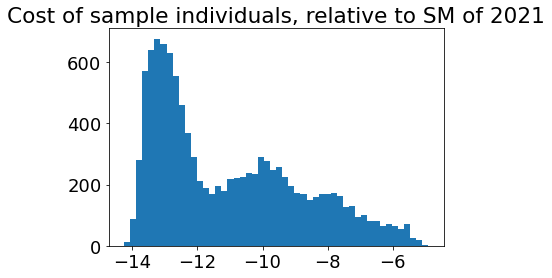

In [11]:
# Get a bag of sample individuals

bag = []
for y in Indivs_yr.values():
    bag = bag + y
    
# Get costs for every individual using P of 2021 as reference
year = 2021
S = simMat_yr[year - min_yr].copy()
P = symmetrize(S,zero_diag=True)
    
bag_costs = [cost(P,I) for I in bag]

# Distribution of costs
plt.hist(bag_costs,bins=50)
plt.title("Cost of sample individuals, relative to SM of 2021");

In [12]:
# Compare difference in cost against similarity measure
rs = [2,3,5,6,8]


#############
# Get best individual
#############
best_i = np.argmin(bag_costs)
best_ind = bag[best_i]
best_cost = bag_costs[best_i]

# Remove best individual from sample, not to compare with itself
bag_costs.pop(best_i)
bag.pop(best_i);

#############
# Do the same with some random, average individual
#############
# Assign a gaussian probability to each value in bag_costs, and sample using that
def gaussian(X, mn, sd):
    p = np.exp(-0.5 * ((X-mn)/sd)**2)
    return p

# Select an individual with cost around -10. 
mn, sd = -10, 0.3
p = gaussian(np.array(bag_costs), mn, sd)
p = p/p.sum()

indx = np.random.choice(range(len(bag_costs)),
                        p=p, replace=False)


sampl_indiv = bag[indx]
sampl_cost = bag_costs[indx]

bag_costs.pop(indx)
bag.pop(indx)


#############
# Calc similarities between selected individuals, and everything else
#############
comp_rs_best = [[comparePerms(p1,best_ind,r=r) for p1 in bag] for r in rs]
comp_rs_avgi = [[comparePerms(p1,sampl_indiv,r=r) for p1 in bag] for r in rs]

comp_rs = [comp_rs_best, comp_rs_avgi]
costs_samp = [best_cost, sampl_cost]

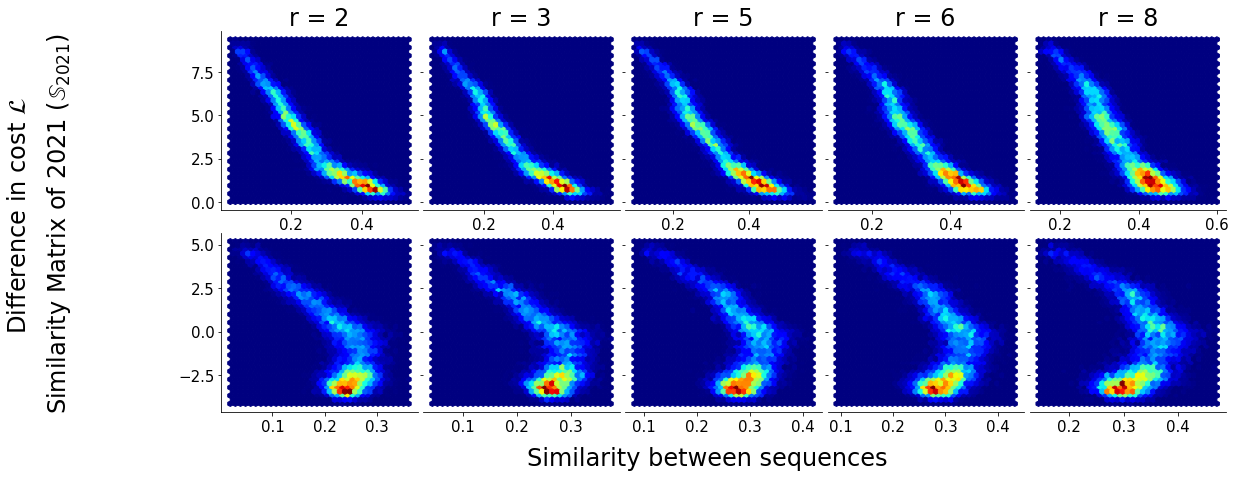

In [13]:
plt.rcParams["font.size"] = 15

fig, ax = plt.subplots(2,5,figsize=(18,7),
                       gridspec_kw={'wspace':0.03,'hspace':0.13})


for j in range(2):
    for i, r in enumerate(rs):
        ax[j,i].hexbin(x=comp_rs[j][i], 
                       y=np.array(bag_costs) - costs_samp[j],
                       gridsize=35,
                       cmap=cmap)
  
          
    
        if j==0:       ax[j,i].set_title(f'r = {r}',fontsize=24)

    for i in range(5):
        ax[j,i].spines['right'].set_visible(False)
        ax[j,i].spines['top'].set_visible(False)
        ax[j,i].spines['left'].set_visible(False)
    for i in range(1,5):
        ax[j,i].set_yticklabels([])
    ax[j,0].spines['left'].set_visible(True)


plt.text(-1.75,0.2,s=r"Difference in cost $\mathcal{L}$",fontdict={"rotation":90,"size":24})
plt.text(-1.68,-4.3,s=r"Similarity Matrix of 2021 ($\mathbb{S}_{2021})$",fontdict={"rotation":90,"size":24})

fig.supxlabel('Similarity between sequences',fontsize=24)


plt.savefig('../Results/cost_similar_permuts.png',dpi=300,bbox_inches="tight")

## It would in principle be desirable to use a value of r which is as small as possible, so that the interpretation still holds. With r=8, for instance, the concept of `neighborhood` is lost.

The plots above give us confidence that r=2 is an appropriate choice.

---

In [14]:
def historyMatrix(p, r):
    """
    This is a highly vectorized version of `comparePerms`.
    In each iteration, compares a single permutation, simultaneously with one for each year (222 total).
    
    r is radius to consider elements to be close in a sequence.
    p is number of permutations to use. Use only the best `p` found each year.
    """
    
    # Each year, sort optimized permutations by cost
    Indivs_yr_sort = {}
    for yr in Indivs_yr.keys():
        Indivs_yr_sort[yr] = []

        S = simMat_yr[yr - min_yr].copy()
        P = symmetrize(S)

        a = np.array([cost(P,ind) for ind in Indivs_yr[yr]])

        # Sort the list of Individuals for each year, based on cost
        order = np.argsort(a)
        Indivs_yr_sort[yr] = np.array(Indivs_yr[yr])[order]


    # Calc if diag entry of element `i` is > 0 in simMat for every year
    exist_elems = np.einsum('ijj->ij',simMat_yr)>0

    # Convert to array of dim (222, 50, 103, 1)
    a = np.array([Indivs_yr_sort[y] for y in range(1800,2022)])[...,np.newaxis]

    # Get matrix of distances between each pair of elements, in each permutation
    a = np.abs(a - a.reshape(222, 50, 1, 103))

    # Get only upper diag of matrix, so combs. of elements are not repeated
    a = np.triu(a,k=1)

    # And convert these elements two high values, so don't count in sum
    a[a==0] = 200

    # Initialize matrix of historical comparisons
    matrix = np.zeros((222,222))

    # Iterate over year, and two indexes of permutation.
    for i,y in enumerate(range(1800,2022)):
        for j in range(p):
            for k in range(p):

                # Mask elements that don't exist this year
                mask = exist_elems[i]
                mask = ~(mask * mask.reshape(-1,1)) * 1
                mask[mask==1] = 200 # mask[i,j] > 200 if either ith or jth element don't exist, else 0

                # Sum mask. If elements exist, values are not modified. Thus if val < r, condition is satisfied.
                l1 = (a[i,j] + mask) <= r
                l2 = (a[:,k] + mask) <= r

                sim = np.sum(l1*l2, axis=(1,2))

                # Normalize using one of this year's permutation
                nor = np.sum(l1*l1) # Compare perm to itself

                matrix[i] += sim/nor  # Sum now, divide by number of combinations later

    # This division gets the average.
    return matrix/p**2

def plotHistory(matrix,sz=15,pad=4,save=False, norm = LogNorm(), cmap = cmap):
    
    fig,ax = plt.subplots(2,1,figsize=(sz,sz),
                           gridspec_kw={"height_ratios":[100,1],"hspace":0.18}) 
    
    sns.heatmap(matrix,norm=norm, ax=ax[0],cmap=cmap,cbar_ax=ax[1],
                cbar_kws={"orientation":"horizontal"})#,"ticks":[5e-1]})

    #matrix[0,0] = 0
    
    #labels = [i+1800 for j,i in enumerate(range(matrix.shape[0])) if j%10==0]
    #locs = (np.array(labels) - 1800)  + 0.5
    
    from matplotlib.ticker import (MultipleLocator, FixedLocator)
    
    xlab = np.array([1800, 1826, 1860, 1900, 1948, 1965, 2021])
    ylab = np.array([1800, 1816, 1826, 1848, 1860, 1874, 1884, 1900, 1910, 1948, 1965, 2021])

    
    ax[0].set_xticks(xlab - 1800 +0.5)
    ax[0].set_yticks(ylab - 1800 + 0.5)
    
    ax[0].set_xticklabels(xlab,rotation=0)
    ax[0].set_yticklabels(ylab,rotation=0)
    
    min_loc = FixedLocator(np.arange(1800,2022)+0.5 - 1800)
    ax[0].xaxis.set_minor_locator(min_loc)
    ax[0].yaxis.set_minor_locator(min_loc)
    
    
    
    ax[0].tick_params(top=True,bottom=True,labelbottom=True, labeltop=True)
    secax = ax[0].secondary_xaxis('top')
    secax.xaxis.set_minor_locator(min_loc)
    secax.set_xticks([])
    
    for sp in ax[0].spines.items():
        sp[1].set_visible(True)
    
    ax[0].invert_yaxis()
    
    
    ax[1].set_title("Similarity", fontsize=24)
    
    #ax[0].yaxis.tick_right()
    


    if save:
        plt.savefig(save,dpi=300,bbox_inches='tight')

# Notice: Matrix is not symmetric due to difference in normalization on either side of diagonal.

Values are always normalized using as reference the permutations of year in `y` axis.

In [15]:
%%time
# Calculate history matrix using r=2 and 15 best permutations of each year.
matrix_r2 = historyMatrix(15,2)
np.save('../Data/hist_matrix.npy', matrix_r2)

CPU times: user 2min 41s, sys: 1.57 s, total: 2min 42s
Wall time: 2min 42s


In [21]:
matrix_r2 = np.load('../Data/hist_matrix.npy')

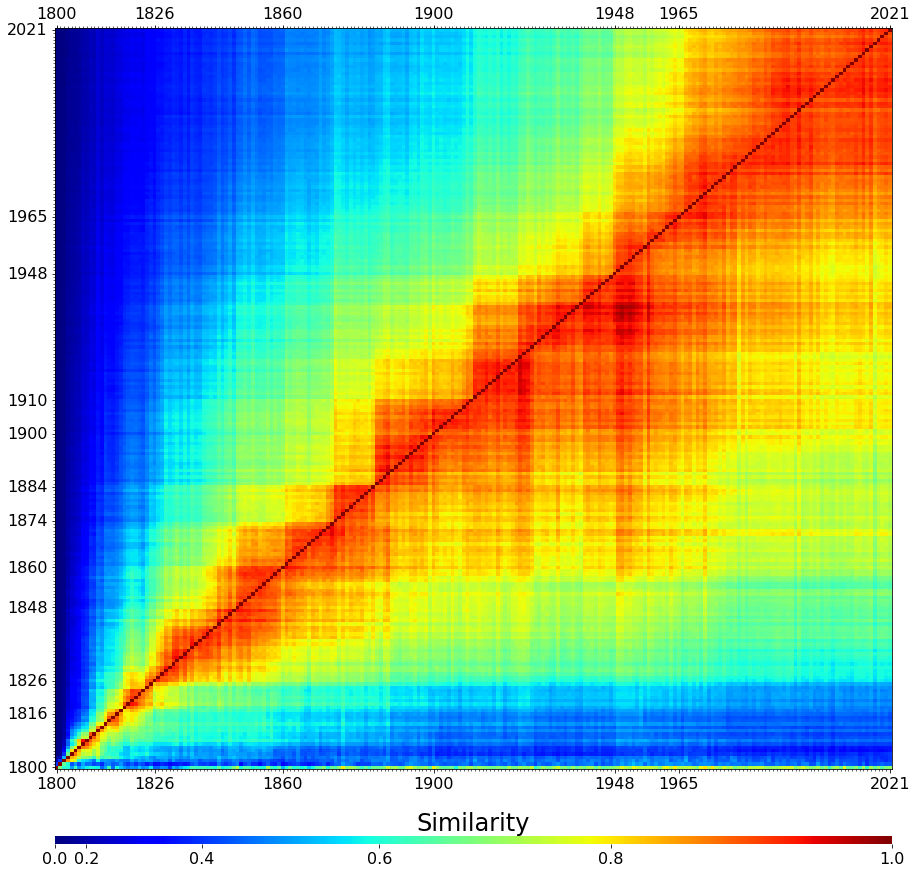

In [23]:
g = matrix_r2.copy()
il = np.diag_indices_from(g)

# Normalize over self-similarity of each year
g /= g[il]

plt.rcParams["font.size"]=16
plotHistory(g, norm=colors.PowerNorm(gamma=1.7), 
            save = 'PS-history_r2.png')

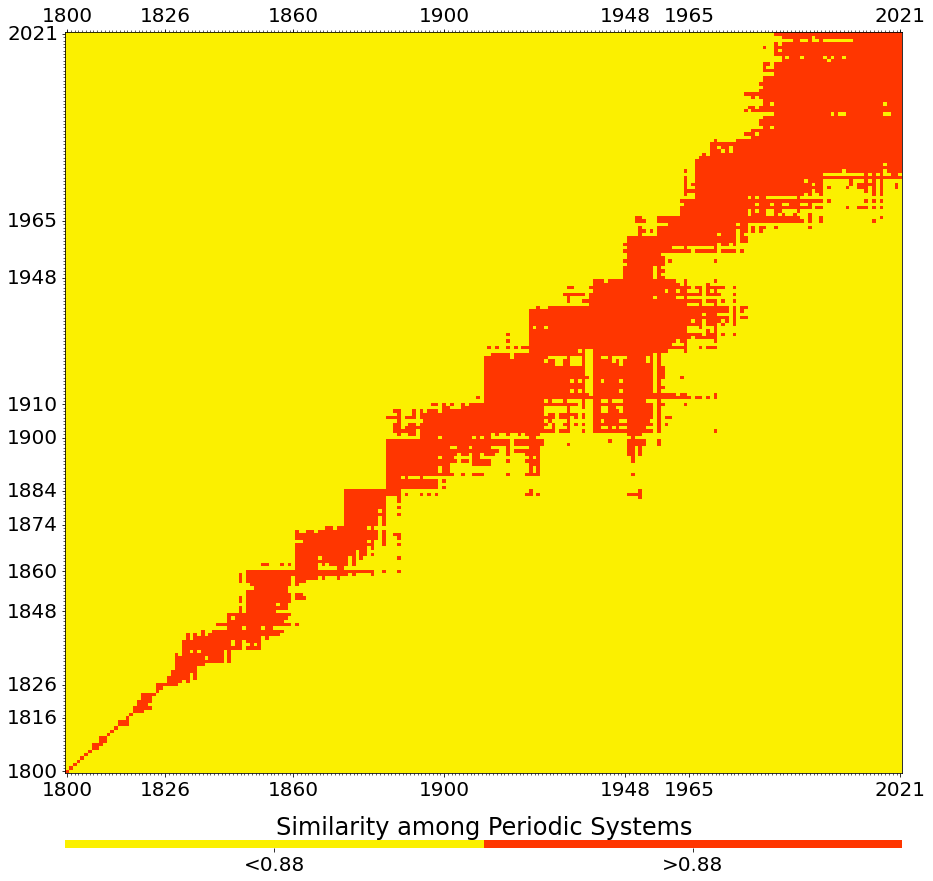

In [67]:
il = np.diag_indices_from(g)

g[il] = 1

plt.rcParams["font.size"]=20

def plotHistory_thresh(matrix,sz=15,pad=4,save=False, norm = LogNorm(), cmap = cmap):
    
    fig,ax = plt.subplots(2,1,figsize=(sz,sz),
                           gridspec_kw={"height_ratios":[100,1],"hspace":0.18}) 
    
    sns.heatmap(matrix,norm=norm, 
                ax=ax[0],
                cmap=cmap,
                cbar_ax=ax[1],
                cbar_kws={"orientation":"horizontal", "ticks":[0.25,0.75]
                         }
               )

    #matrix[0,0] = 0
    
    #labels = [i+1800 for j,i in enumerate(range(matrix.shape[0])) if j%10==0]
    #locs = (np.array(labels) - 1800)  + 0.5
    
    from matplotlib.ticker import (MultipleLocator, FixedLocator)
    
    xlab = np.array([1800, 1826, 1860, 1900, 1948, 1965, 2021])
    ylab = np.array([1800, 1816, 1826, 1848, 1860, 1874, 1884, 1900, 1910, 1948, 1965, 2021])

    
    ax[0].set_xticks(xlab - 1800 +0.5)
    ax[0].set_yticks(ylab - 1800 + 0.5)
    
    ax[0].set_xticklabels(xlab,rotation=0)
    ax[0].set_yticklabels(ylab,rotation=0)
    
    min_loc = FixedLocator(np.arange(1800,2022)+0.5 - 1800)
    ax[0].xaxis.set_minor_locator(min_loc)
    ax[0].yaxis.set_minor_locator(min_loc)
    
    
    
    ax[0].tick_params(top=True,bottom=True,labelbottom=True, labeltop=True)
    secax = ax[0].secondary_xaxis('top')
    secax.xaxis.set_minor_locator(min_loc)
    secax.set_xticks([])
    
    for sp in ax[0].spines.items():
        sp[1].set_visible(True)
    
    ax[0].invert_yaxis()
    
    ax[1].set_xticklabels(["<0.88",">0.88"])
    
    ax[1].set_title("Similarity among Periodic Systems", fontsize=24)
    #ax[0].yaxis.tick_right()
    
    if save:
        plt.savefig(save,dpi=300,bbox_inches='tight')
        
    
    plt.show()
    
        
from matplotlib.colors import ListedColormap
cmap2 = ListedColormap(['#fbf000', '#ff3600'])

plotHistory_thresh(g>0.88,sz=15,pad=4,
                   save="PS-history-thresh-088.png", 
                   cmap = cmap2,
                   norm=None)

# Plot change in number of elements each year

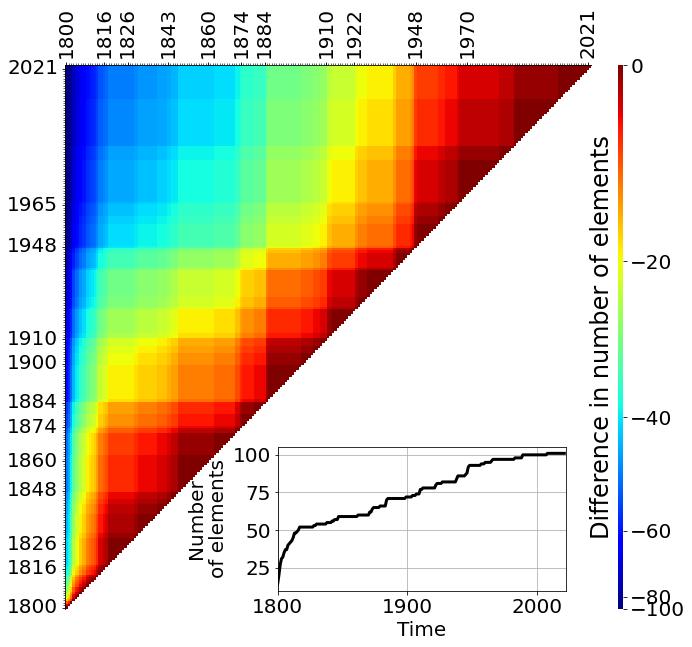

In [85]:
a = (np.einsum('ijj->ij',simMat_yr)>0).sum(axis=1).reshape(1,-1)

m = np.tril(a - a.T)
mask = np.tril(np.ones(m.shape[0]))

with np.errstate(invalid='ignore'):
    m = m/mask
    
    
import matplotlib.colors as colors
fig,ax = plt.subplots(1,2,figsize=(10,10),gridspec_kw={"width_ratios":[100,1],"wspace":0.1})


sns.heatmap(m,cmap=cm.get_cmap("jet"),ax=ax[0],cbar_ax=ax[1],
          norm=colors.PowerNorm(gamma=1.8))
ax[0].invert_yaxis()


ax[1].yaxis.set_ticks_position('right')
ax[1].yaxis.set_label_position("left")
ax[1].set_ylabel("Difference in number of elements", fontsize=24)

from matplotlib.ticker import (MultipleLocator, FixedLocator)
    
xlab = np.array([1800, 1816, 1826, 1843, 1860, 1874, 1884, 1910, 1922, 1948, 1970, 2021])
ylab = np.array([1800, 1816, 1826, 1848, 1860, 1874, 1884, 1900, 1910, 1948, 1965, 2021])

    
ax[0].set_xticks(xlab - 1800 +0.5)    
ax[0].set_yticks(ylab - 1800 + 0.5)

ax[0].tick_params("x",top=True,labeltop=True,
                  bottom=False,labelbottom=False)

ax[0].set_xticklabels(xlab,rotation=90)
ax[0].set_yticklabels(ylab,rotation=0)
    
min_loc = FixedLocator(np.arange(1800,2022)+0.5 - 1800)

secax = ax[0].secondary_xaxis('top')
secax.xaxis.set_minor_locator(min_loc)
secax.set_xticks([])

ax[0].yaxis.set_minor_locator(min_loc)

for sp in ax[0].spines.items():
    sp[1].set_visible(True)
    
for sp in ["bottom","right"]:
    ax[0].spines[sp].set_visible(False)
    
    
    
l, b, h, w = .42, .15, .20, .40
ax2 = fig.add_axes([l, b, w, h])
ax2.set_ylabel("Number\nof elements")
ax2.set_xlabel("Time")
ax2.plot(range(1800,2022),
         a.flatten()[1:], 
         color='k', lw=3)
ax2.grid()
ax2.patch.set_alpha(0.1)
ax2.set_xlim(1800,2022)
ax2.set_yticks([25,50,75,100])

#ax2.legend(loc='lower right')
#plt.show()

plt.savefig("diff_numElems.png",dpi=300)

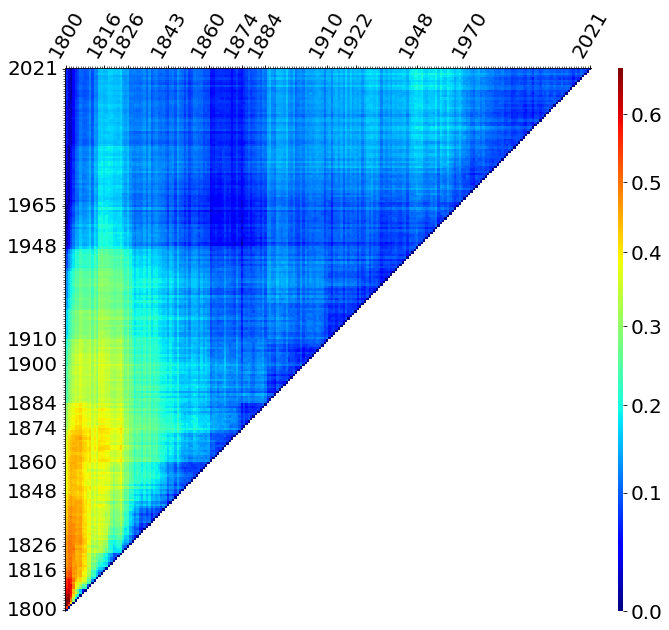

In [407]:
ed = (m-np.nanmin(m))/(-np.nanmin(m))


fig,ax = plt.subplots(1,2,figsize=(10,10),gridspec_kw={"width_ratios":[100,1],"wspace":0.1})


sns.heatmap(np.abs(ed[:-1][:,:-1] - g),cmap=cm.get_cmap("jet"),ax=ax[0],cbar_ax=ax[1],
          norm=colors.PowerNorm(gamma=0.8))
ax[0].invert_yaxis()


from matplotlib.ticker import (MultipleLocator, FixedLocator)
    
xlab = np.array([1800, 1816, 1826, 1843, 1860, 1874, 1884, 1910, 1922, 1948, 1970, 2021])
ylab = np.array([1800, 1816, 1826, 1848, 1860, 1874, 1884, 1900, 1910, 1948, 1965, 2021])

    
ax[0].set_xticks(xlab - 1800 +0.5)    
ax[0].set_yticks(ylab - 1800 + 0.5)

ax[0].tick_params("x",top=True,labeltop=True,
                  bottom=False,labelbottom=False)

ax[0].set_xticklabels(xlab,rotation=60)
ax[0].set_yticklabels(ylab,rotation=0)
    
min_loc = FixedLocator(np.arange(1800,2022)+0.5 - 1800)

secax = ax[0].secondary_xaxis('top')
secax.xaxis.set_minor_locator(min_loc)
secax.set_xticks([])

ax[0].yaxis.set_minor_locator(min_loc)

for sp in ax[0].spines.items():
    sp[1].set_visible(True)
    
for sp in ["bottom","right"]:
    ax[0].spines[sp].set_visible(False)
    
plt.savefig("diff_sim_numelems.png",dpi=300)

In [ ]:
# fig,ax = plt.subplots(figsize=(15,4))

dff_ = pd.DataFrame(columns=["year","derivative"])
dff_["year"] = range(1800,2022)
dff_["derivative"] = np.diff(a)[0]

ax.plot(range(1800,2022),np.diff(a)[0], color='k')


ax.set_xticks(range(1800,2021,10))
ax.set_xticklabels(range(1800,2021,10), rotation=90)
ax.grid()

plt.savefig("deriv_numelems.png",dpi=300, bbox_inches="tight")

dff_.to_csv("deriv_numelems.csv")


# Test effect of the lanthanides between 1948 and 1965.

In [68]:
def mat_customBag(bag, Y1, Y2):
    """
    Compute a history matrix for some slice of the PS, between Y1 and Y2.
    Slice must be consistently defined.
    Bag is a dict {year: [list of slices]}
    """
    hist = np.zeros((Y2-Y1,Y2-Y1))*np.nan

    for y1c, y1 in enumerate(range(Y1,Y2)):
        for y2c, y2 in enumerate(range(Y1, y1)):
            avg = 0
            for i in range(15):
                for j in range(15):

                    sij = comparePerms(bag[y1][i],
                                       bag[y2][j],
                                       r=2)
                    avg += sij

            hist[y1c,y2c] = avg/15**2
    return hist


def plot_hist_custom(hist, Y1, Y2, save=False):
    """
    Plot the above
    """
    fig,ax = plt.subplots(2,1,figsize=(10,10),
                          gridspec_kw={"height_ratios":[100,1],"hspace":0.1}) 

    sns.heatmap(hist,norm=colors.PowerNorm(gamma=1.1),
                ax=ax[0],cmap=cmap,cbar_ax=ax[1],
                cbar_kws={"orientation":"horizontal"})#,"ticks":[5e-1]})

    ax[0].set_yticks(range(0,Y2-Y1+1,4))    
    ax[0].set_yticklabels(range(Y1,Y2+1,4), rotation=0)
    ax[0].set_xticks(range(0,Y2-Y1+1,4))    
    ax[0].set_xticklabels(range(Y1,Y2+1,4), rotation=90)
    ax[0].invert_yaxis()


    ax[0].tick_params("x",top=True,labeltop=True,
                      bottom=False,labelbottom=False)

    for sp in ax[0].spines.items():
        sp[1].set_visible(True)

    for sp in ["bottom","right"]:
        ax[0].spines[sp].set_visible(False)

    if save:
        plt.savefig(save,dpi=300, bbox_inches='tight')
    plt.show()

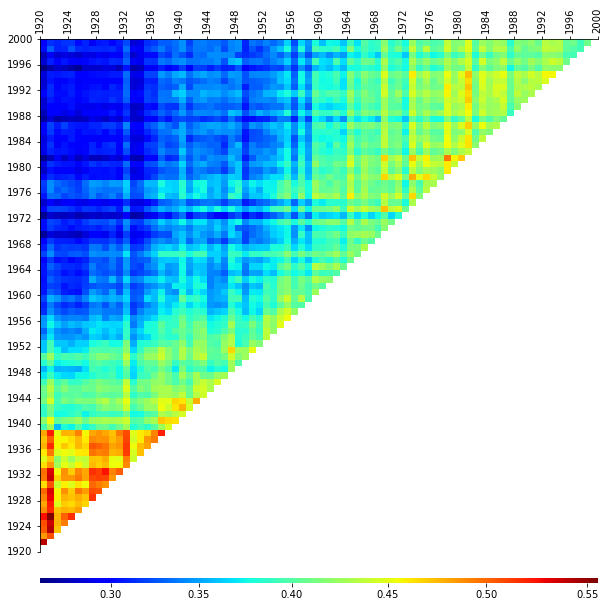

In [71]:
# Get only the lanthanides


Y1, Y2 = 1920, 2000
la_bag = {y:
          [Indivs_yr_sort[y][i][57:72] 
           for i in range(15)] 
          for y in range(Y1,Y2)
         }

hist_la = mat_customBag(la_bag, Y1, Y2)

plot_hist_custom(hist_la, Y1, Y2, save=False)

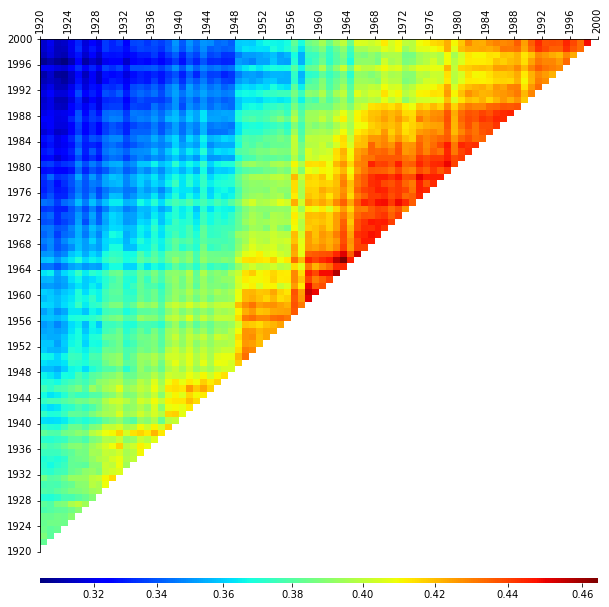

In [74]:
# Get everything BUT the lanthanides


Y1, Y2 = 1920, 2000
nola_bag = {y:
          [np.concatenate([Indivs_yr_sort[y][i][:57], Indivs_yr_sort[y][i][72:] ])
           for i in range(15)] 
          for y in range(Y1,Y2)
         }

hist_nola = mat_customBag(nola_bag, Y1, Y2)

plot_hist_custom(hist_nola, Y1, Y2, save=False)

# Similarly calc. variance in num Compounds.

In [26]:
# Compute number of compounds per element per year
!gawk -f nCompsPerElem.awk ../Data/format_MFs.tsv > ../Data/numCompoundsPerElem.tsv

In [27]:
# Load number of compounds per element
ncomps = pd.read_csv("../Data/numCompoundsPerElem.tsv", 
                     sep="\t",
                     index_col=0)

ncomps = ncomps.fillna(0)

# Filter: only those elements in elemList
ncomps = ncomps.loc[elemList]
ncomps

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
elem,,,,,,,,,,,,,,,,,,,,,
H,23.0,16.0,10.0,6.0,15.0,11.0,16.0,12.0,8.0,19.0,...,104438.0,103801.0,101159.0,97994.0,101968.0,97095.0,101391.0,100122.0,100215.0,7259.0
He,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
Li,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1072.0,881.0,973.0,843.0,1066.0,1102.0,1065.0,1202.0,1033.0,41.0
Be,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,26.0,15.0,11.0,26.0,50.0,82.0,60.0,52.0,3.0
B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,...,9245.0,8855.0,9211.0,8910.0,10538.0,9707.0,10902.0,10704.0,11020.0,589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Es,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Md,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/var/folders/jc/r6hh21fn6pbdw40fk1qfg3w80000gq/T/ipykernel_24037/4034878610.py:33: RuntimeWarning: divide by zero encountered in log
  np.log(


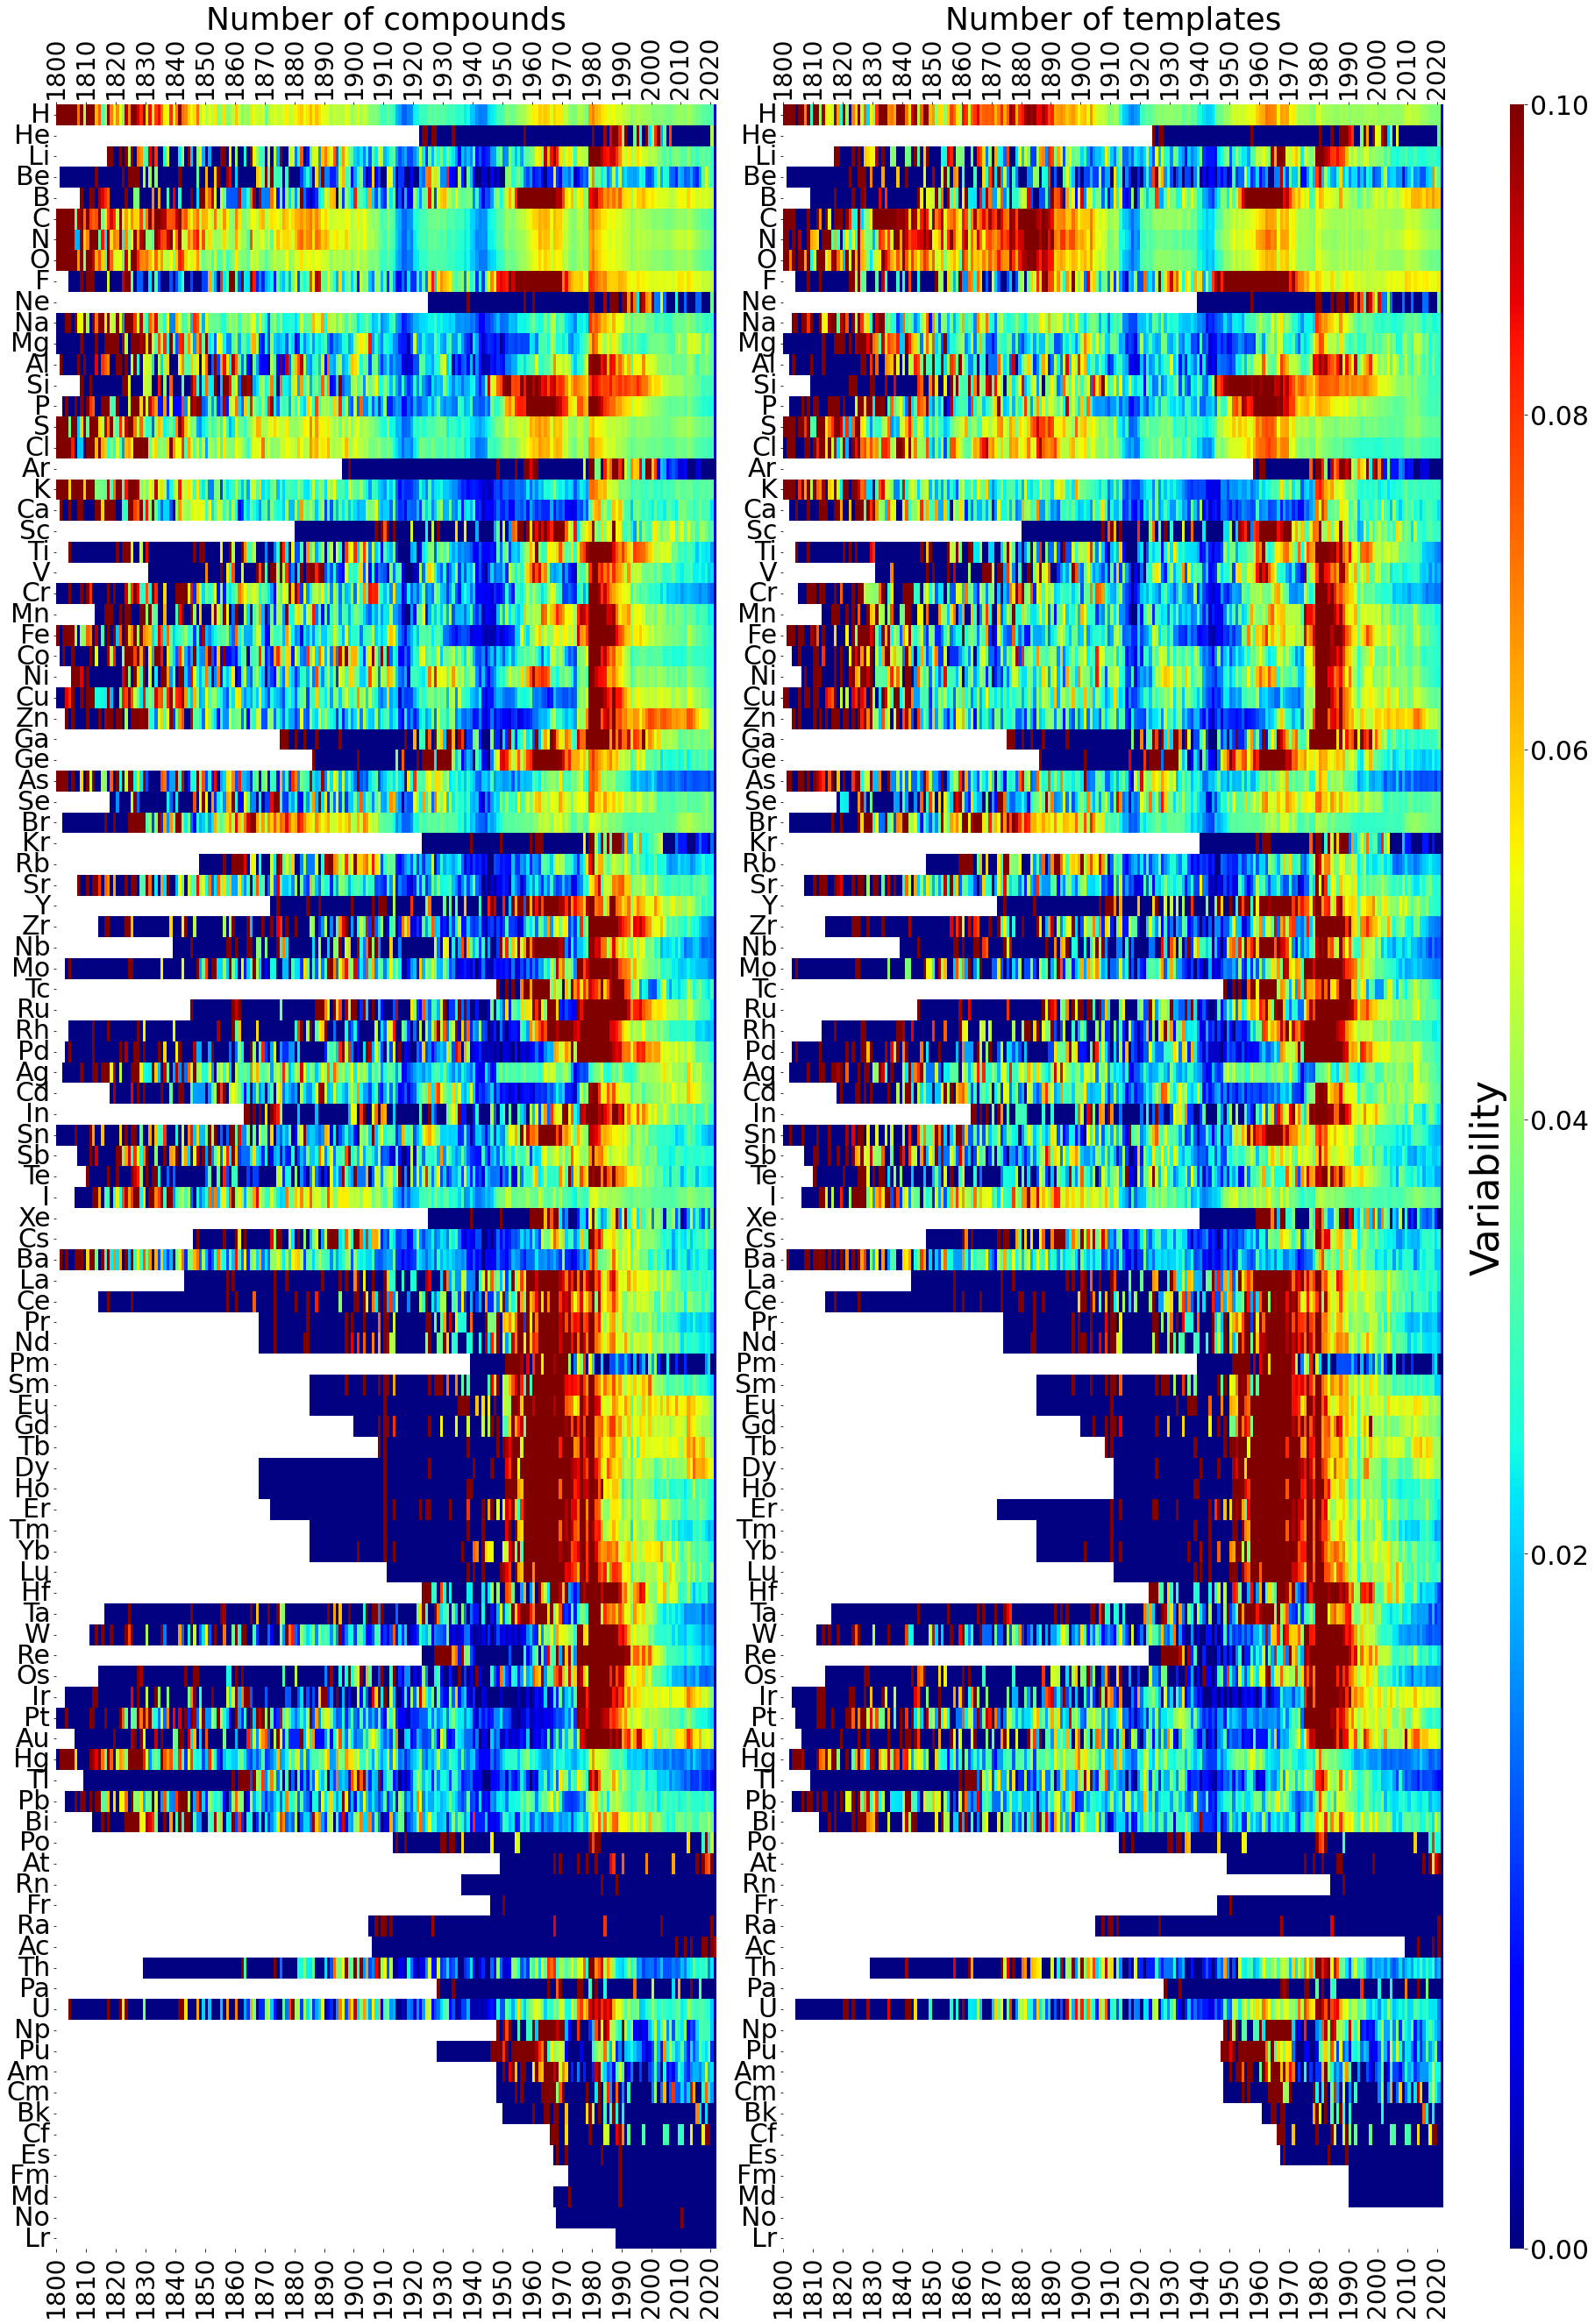

In [68]:
plt.rcParams["font.size"]=30

fig,ax = plt.subplots(1,3,
                      figsize=(30,45),
                      gridspec_kw={"width_ratios":[140,140,3],
                                   "wspace":0.15});

def hmap_variability(variation, ax, cbar, title, ylabel=True):
    
    sns.heatmap(variation, 
            cmap=cmap, 
            cbar_ax = cbar,
            ax=ax,
            norm=colors.PowerNorm(gamma=0.7))

    
    ax.xaxis.set_ticks_position("both")
    ax.set_yticks(np.arange(len(elemList))+0.5)
    ax.set_yticklabels(elemList, rotation=0);
    if not ylabel:
        ax.set_yticklabels([])
    ax.set_ylabel("")

    ax.tick_params(labelbottom=True, labeltop=True)
    ax.set_xticks(range(0,2022-1800,10))
    ax.set_xticklabels(range(1800,2022,10),rotation=90, fontsize=28)
    ax.set_title(title)
    
    
    
# Variation in number of templates
variation_elems = np.diff(
                        np.log(
                            np.einsum('ijj->ij',
                                      simMat_yr)
                        ),axis=0).T

variation_elems[np.isinf(variation_elems)]=np.nan
variation_elems = np.clip(variation_elems, a_min=0, a_max=0.1)

# Plot
hmap_variability(variation_elems, ax[1], ax[2], title="Number of templates")


# Variation in number of compounds
variation_comps = np.diff(np.log(ncomps.cumsum(axis=1)))

variation_comps[np.isinf(variation_comps)]=np.nan
variation_comps = np.clip(variation_comps, a_min=0, a_max=0.1)

variation_comps = pd.DataFrame(variation_comps,index=ncomps.index)

# Plot
hmap_variability(variation_comps, ax[0], ax[2], title="Number of compounds")


ax[2].yaxis.set_ticks_position('right')
ax[2].yaxis.set_label_position("left")
ax[2].set_ylabel("Variability", fontsize=45)

plt.savefig("variance_elems.png",dpi=300,bbox_inches="tight")

# 